In [1]:
from os import system
from glob import glob

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
def gather_data():
    url = "https://ar.wikipedia.org/wiki/%D9%82%D8%A7%D8%A6%D9%85%D8%A9_%D9%85%D8%AD%D8%A7%D9%81%D8%B8%D8%A7%D8%AA_%D8%A7%D9%84%D8%B3%D8%B9%D9%88%D8%AF%D9%8A%D8%A9"
    _, _, *locations_df_list = pd.read_html(url)
    locations_df_list = locations_df_list[:13]
    
    provinces = [
#         "Riyadh",
        "Makkah",
        "Madinah",
        "Buraydah",
        "Dammam",
        "Abha",
        "Tabuk",
        "Ha'al",
        "Arar",
        "Jazan",
        "Najran",
        "Alba'hah",
        "Sakaka"
    ]

    geos = [
#         (24.721540, 46.705117),
        (21.422719, 39.825616),
        (24.468361, 39.610744),
        (26.338439, 43.966748),
        (26.412899, 50.071757),
        (18.215544, 42.502229),
        (28.394034, 36.570041),
        (27.516989, 41.697790),
        (30.977227, 41.024822),
        (16.889081, 42.569220),
        (20.011137, 41.465389),
    ]
    
    for province, geo in zip(provinces, geos):
        system(f'twint -g="{geo[0]},{geo[1]},2km" -o "data/{province}_big.csv" --csv')
        
gather_data()

1345

In [77]:
csvs = [path for path in glob("data/*") if "big" not in path]
dfs = [(csv[csv.rfind("\\")+1:csv.rfind(".")], pd.read_csv(csv, sep="\t")) for csv in csvs]

C:\Softwarez\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning:

Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.

C:\Softwarez\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.



In [78]:
for province, df in dfs:
    df["province"] = province
    
provs = pd.concat([df for _, df in dfs])

provs["date"] = pd.to_datetime(provs.pop('date') + " " + provs.pop('time'))

In [79]:
tweets_by_year = provs.groupby([provs.date.dt.year, "province"]).size()

In [88]:
years, countries = list(zip(*tweets_by_year.index))

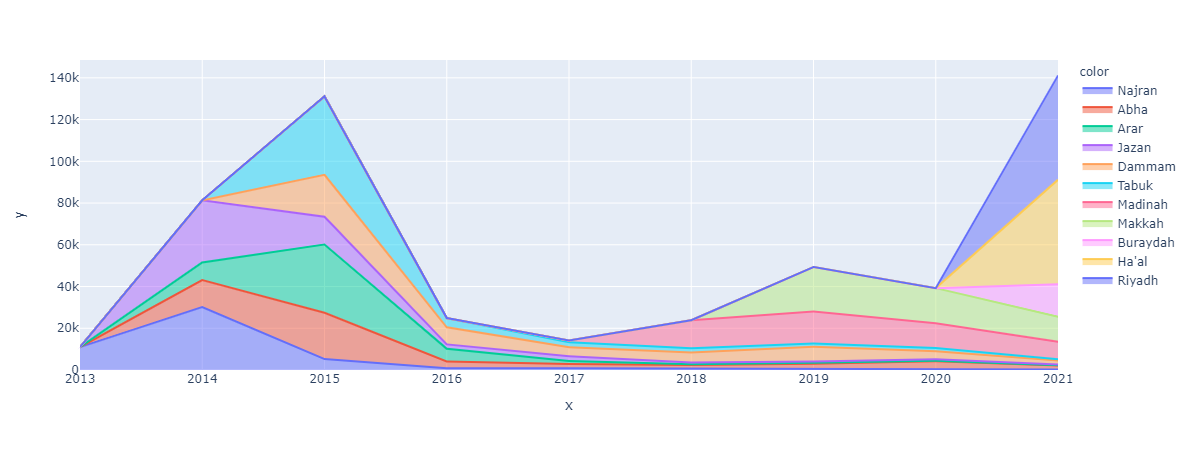

In [89]:
px.area(x=years, y=tweets_by_year.values, color=countries)